<a href="https://colab.research.google.com/github/bonareri/Machine_Learning_1/blob/main/Dimensional_reduction_PCA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('seaborn-whitegrid')

In [2]:
#import libraries
# General Libraries
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dimensionality Reduction
from sklearn.decomposition import PCA

# Data Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Model Building (optional, depending on your downstream task after PCA)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

# Metrics (optional, for evaluating models after PCA)
from sklearn.metrics import classification_report, precision_recall_curve, roc_auc_score, f1_score, confusion_matrix

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [29]:
#loading data
wine_analysis = pd.read_csv('/content/winequality-red.csv', sep=";")
wine_analysis.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [41]:
wine_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [42]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [47]:
# Step 4: Apply PCA to project data to 2 dimensions
pca = PCA(n_components=2)  # Project to 2 dimensions
projected = pca.fit_transform(X_scaled)

In [48]:
# Print the shape of the original and transformed data
print(f"Original data shape: {X_scaled.shape}")
print(f"Projected data shape: {projected.shape}")

Original data shape: (1599, 11)
Projected data shape: (1599, 2)


<ipython-input-49-8fd055d8adc5>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('rainbow', 10))


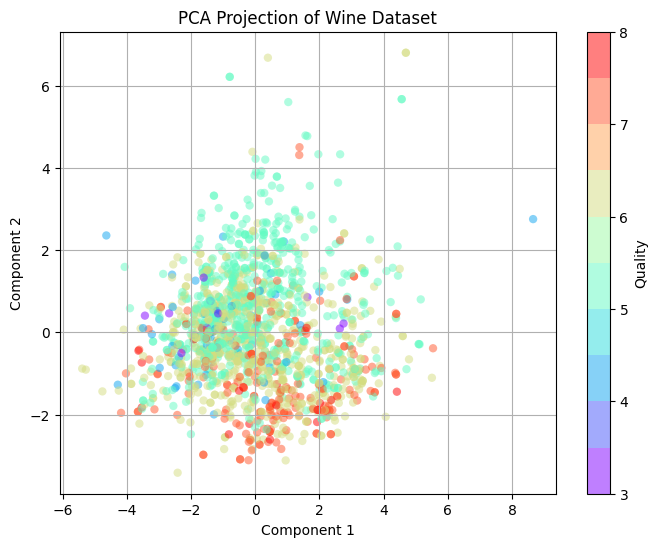

In [49]:
# Step 2: Create the scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(projected[:, 0], projected[:, 1],
                      c=y, edgecolor='none', alpha=0.5,
                      cmap=plt.cm.get_cmap('rainbow', 10))

# Step 3: Label the axes
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Step 4: Add color bar
plt.colorbar(scatter, label='Quality')

# Step 5: Display the plot
plt.title('PCA Projection of Wine Dataset')
plt.grid(True)
plt.show()

In [44]:
# Explained Variance and Cumulative Variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

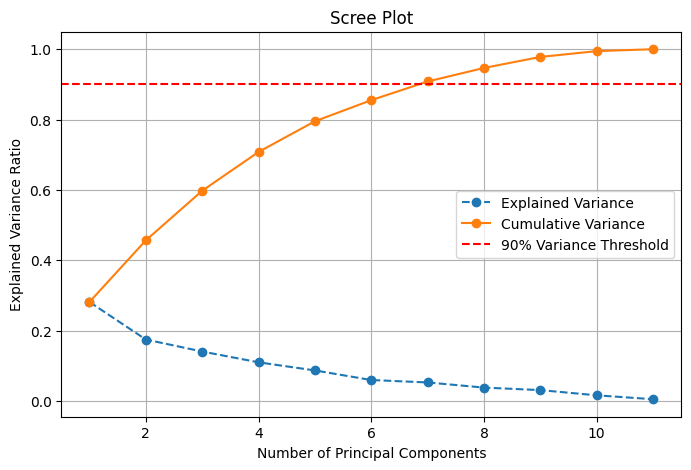

In [45]:
# Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', label='Explained Variance')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', label='Cumulative Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.axhline(0.9, color='r', linestyle='--', label='90% Variance Threshold')
plt.legend()
plt.grid()
plt.show()

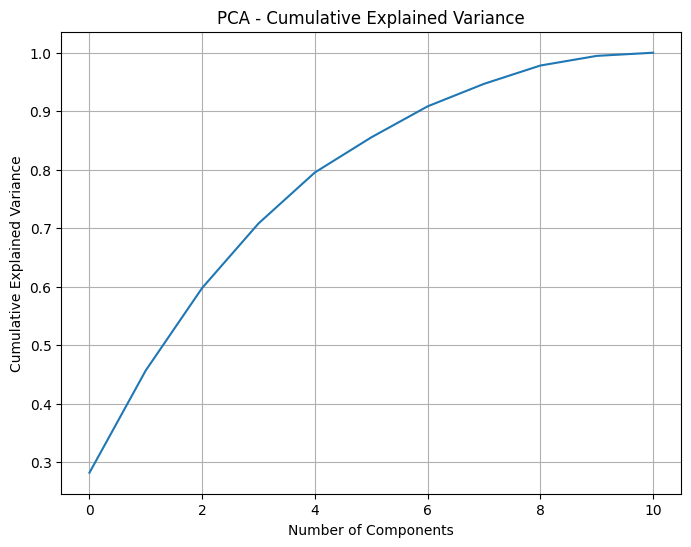

In [46]:
# Plot the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.grid(True)
plt.show()